# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 When taking a look at the bar plot, we can determine 2 things. The most effective medications where Ramicane and Capomulin, on the other hand we have Naftisol which gave us the least recorded Timepoints for the mouses. We can determine this by connecting the fact that the ones with the longer survival rate had more timepoints recorded. Those mices who where on Remicane and Capomulin had the most amount of records and when looking at the charts, we can see that the tumor volume also siginficantly decreases. A great examply is our line plot because we have a different visualization of a mouse who was on Capomulin and visibly shows the progress over timepoints. 
 Taking a look at the Correlation and Regression, we can determine that the older a mouse is, the bigger the tumor is. My scatterplot backs this statment up by showing us the increasing slope that represents how the older the mouse is, the higher the average Tumor Volumn is. We could determine this for humans if we where allowed to do such experiment.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results,
                        how='outer')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count
#combined_data

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID andTimepoint. 
temp1 = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
temp1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#combined_data.loc[combined_data.duplicated(), :]
#combined_data.drop_duplicates(keep=False)
dup_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combined_data = combined_data.rename(columns={"Mouse ID": "Mouse_ID"})
new_combined_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
#combined_data.drop(i)
new_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = new_combined_data["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
i = new_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
mean = new_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = new_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = new_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stand_dev = new_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

sum_stat = pd.DataFrame({"Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": variance,
                        "Tumor Volume Std. Dev.": stand_dev,
                        "Tumor Volume Std. Err.": i})
sum_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_stat2 = new_combined_data.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', np.mean),
                                                         Median=('Tumor Volume (mm3)', np.median),
                                                         Var=('Tumor Volume (mm3)', np.var),
                                                         Std_dev=('Tumor Volume (mm3)', np.std),
                                                         Std_err=('Tumor Volume (mm3)', sem))
sum_stat2

C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34300\666011403.py:5: FutureWarning: The provided callable <function mean at 0x000001E509B57C40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sum_stat2 = new_combined_data.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', np.mean),
C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34300\666011403.py:5: FutureWarning: The provided callable <function median at 0x000001E509C8E660> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sum_stat2 = new_combined_data.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', np.mean),
C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34300\666011403.py:5: FutureWarning: The provided callable <function var at 0x000001E509B68040> is

,Mean,Median,Var,Std_dev,Std_err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, ' # of Observed Mouse Timepoints')

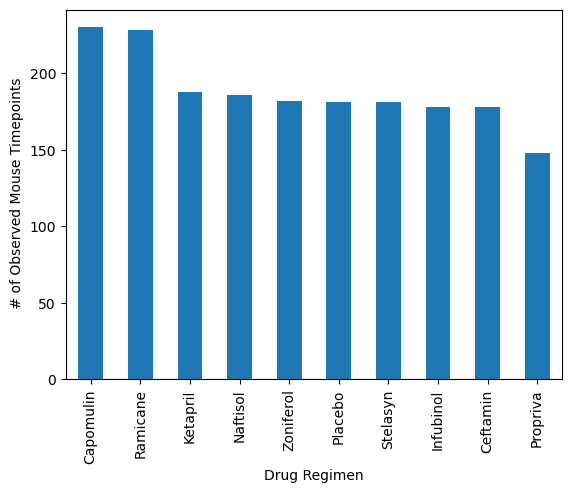

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data = new_combined_data["Drug Regimen"].value_counts()
ax = mouse_data.plot.bar(mouse_data)
plt.ylabel(' # of Observed Mouse Timepoints')

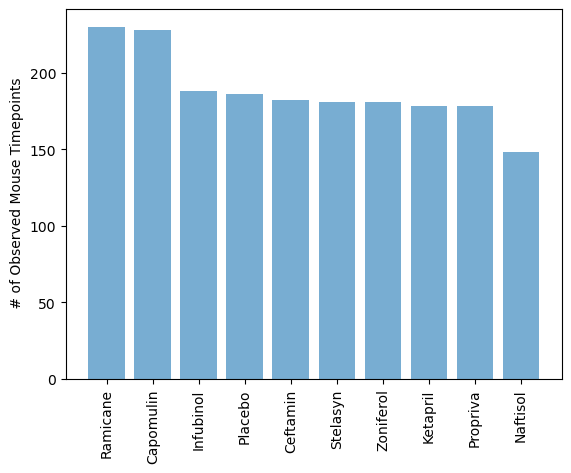

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = new_combined_data["Drug Regimen"].unique()
tick_locations = [value for value in drugs]
plt.bar(drugs, new_combined_data["Drug Regimen"].value_counts(), alpha=0.6, align="center")
plt.xticks(tick_locations, rotation="vertical")
plt.ylabel(' # of Observed Mouse Timepoints')
plt.show()


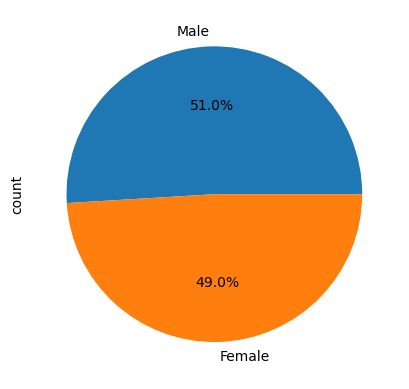

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type = new_combined_data["Sex"].value_counts()
plot = sex_type.plot(kind="pie", autopct="%1.1f%%")



([<matplotlib.patches.Wedge at 0x1e50fa49810>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

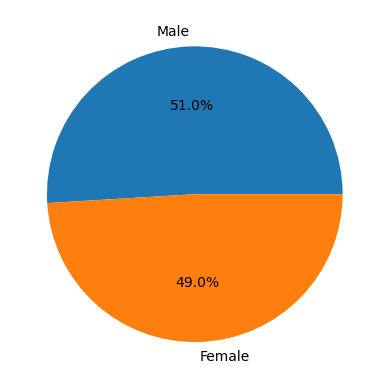

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sx_ty = new_combined_data["Sex"].value_counts()
plt.pie(sx_ty, autopct="%1.1f%%", labels=["Male", "Female"])

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
new_combined_data["Drug Regimen"].unique()
# Start by getting the last (greatest) timepoint for each mouse
max_time = new_combined_data[new_combined_data['Timepoint'] == new_combined_data.groupby('Mouse ID')["Timepoint"].transform(max)]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time

C:\Users\Graciela Aguayo\AppData\Local\Temp\ipykernel_34300\1603577580.py:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_time = new_combined_data[new_combined_data['Timepoint'] == new_combined_data.groupby('Mouse ID')["Timepoint"].transform(max)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
empty= []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

ram = max_time.loc[max_time["Drug Regimen"]=='Ramicane']
cap = max_time.loc[max_time["Drug Regimen"]=='Capomulin']
inf = max_time.loc[max_time["Drug Regimen"]=='Infubinol']
cef = max_time.loc[max_time["Drug Regimen"]=='Ceftamin']

drug_regimen_cap = cap["Drug Regimen"]
tum_val_cap = cap["Tumor Volume (mm3)"]

drug_regimen_inf = inf["Drug Regimen"]
tum_val_inf = inf["Tumor Volume (mm3)"]

drug_regimen_cef = cef["Drug Regimen"]
tum_val_cef = cef["Tumor Volume (mm3)"]

drug_regimen_ram = ram["Drug Regimen"]
tum_val_ram = ram["Tumor Volume (mm3)"]


partial = pd.DataFrame({"Drugs1": drug_regimen_cap,
                       "Drugs2": drug_regimen_inf,
                       "Drugs3": drug_regimen_cef,
                       "Drugs4": drug_regimen_ram,
                       "Tumor1": tum_val_cap,
                       "Tumor2": tum_val_inf,
                       "Tumor3": tum_val_cef,
                       "Tumor4": tum_val_ram})

complete = pd.concat([partial['Drugs1'], partial['Drugs2'], partial['Drugs3'], partial['Drugs4']])
complete2 = pd.concat([partial['Tumor1'], partial['Tumor2'], partial['Tumor3'], partial['Tumor4']])
complete = complete.dropna()
complete2 = complete2.dropna()
final = pd.DataFrame({"Drug Regimen": complete,
                  "Tumor Volume (mm3)": complete2})
for x in final["Drug Regimen"]:
    ram_tum = final["Tumor Volume (mm3)"]
    quartiles = ram_tum.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds 

The lower quartile of Tumor Volume (mm3) is: 37.1877438025
The upper quartile of Tumor Volume (mm3) is: 59.930261755
The interquartile range of Tumor Volume (mm3) is: 22.742517952499995
The the median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


Text(0, 0.5, 'Final Tumor Volume (mm3)')

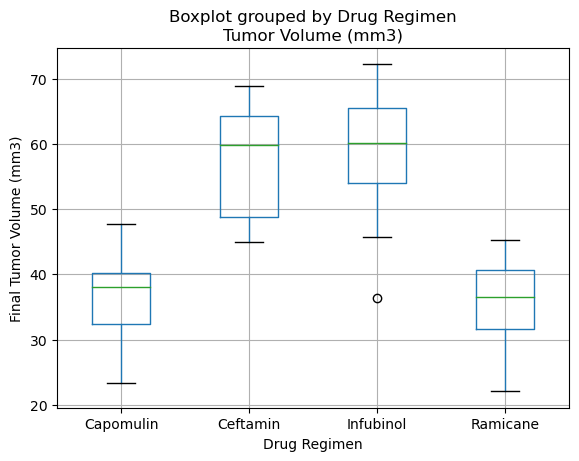

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint (days)')

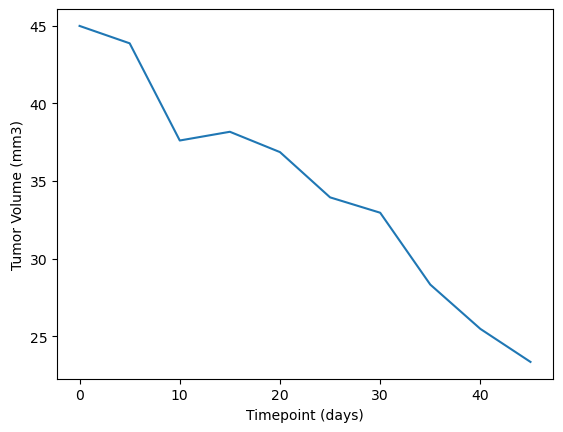

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap = new_combined_data.loc[new_combined_data["Drug Regimen"]== 'Capomulin']
my_mouse = new_combined_data.loc[combined_data["Mouse ID"] == "s185"]
first = my_mouse["Timepoint"]
second = my_mouse["Tumor Volume (mm3)"]
line = pd.DataFrame({"Timepoint": first,
                    "Tumor Volume (mm3)": second})
#aver_time = my_mouse[str('Timepoint')]
#x_ray = aver_time.keys()
#x_ray
plt.plot(first, second)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

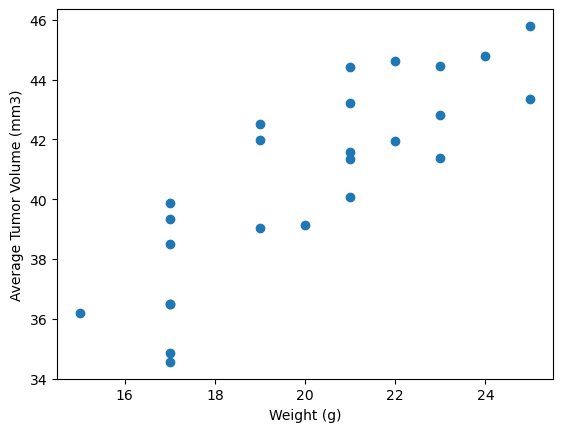

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average = cap["Weight (g)"]
tum = cap["Tumor Volume (mm3)"]
Id = cap["Mouse ID"]
scatter = pd.DataFrame({"id": Id,
                        "weight": average,
                       "Tumor Volume": tum})

okie = scatter.groupby("id")["weight"].mean()
dokie = scatter.groupby("id")["Tumor Volume"].mean()
plt.scatter(okie, dokie)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

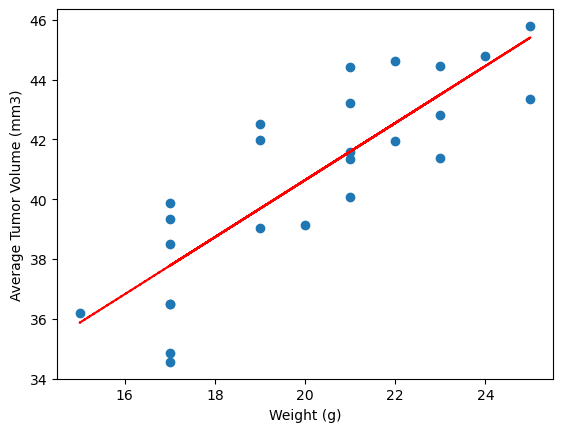

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats
pe_slope, pe_int, pe_r, pe_std,err = stats.linregress(okie, dokie)
pe_fit = pe_slope * okie + pe_int
plt.scatter(okie, dokie)
plt.plot(okie, pe_fit,"--", color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')